In [337]:
import pandas as pd
import numpy as np

In [401]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df['bmi'].isna().sum()
# df = df.drop(columns='id')
# df

201

In [339]:
df['bmi'] = df.groupby('gender')['bmi'].transform(lambda x: x.fillna(x.median()))


<Axes: xlabel='avg_glucose_level', ylabel='Count'>

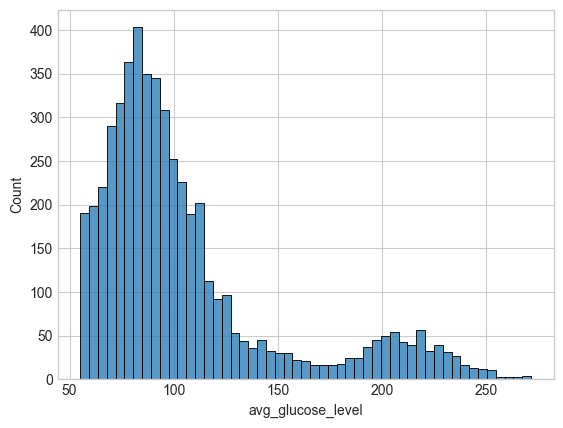

In [340]:
import seaborn as sns
sns.histplot(df['avg_glucose_level'])   

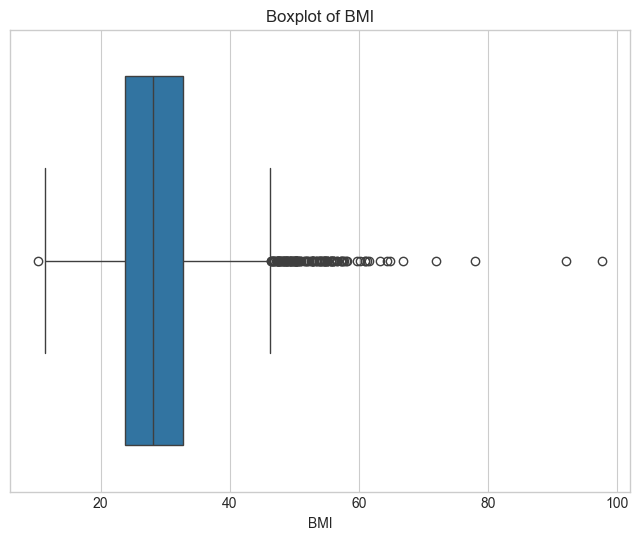

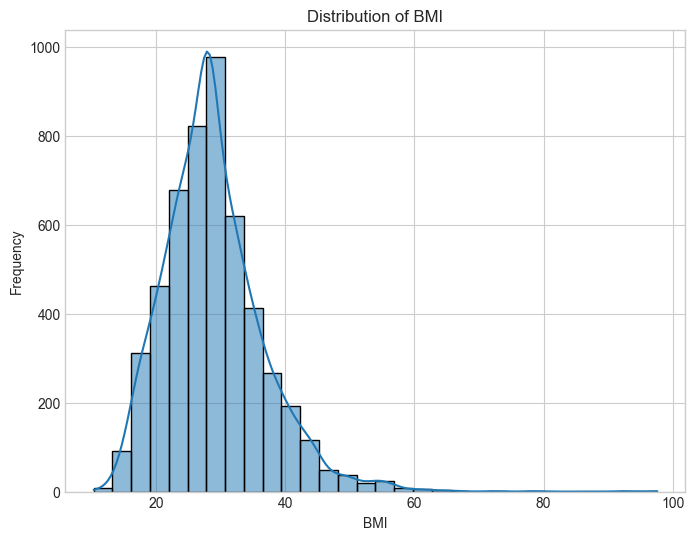

(count    5110.000000
 mean       28.862446
 std         7.699752
 min        10.300000
 25%        23.800000
 50%        28.100000
 75%        32.800000
 max        97.600000
 Name: bmi, dtype: float64,
 0)

In [341]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for BMI
bmi_stats = df['bmi'].describe()

# Check for missing values in BMI
missing_bmi = df['bmi'].isnull().sum()

# Boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df['bmi'], orient='h')
plt.title('Boxplot of BMI')
plt.xlabel('BMI')
plt.show()

# Histogram to visualize BMI distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], kde=True, bins=30)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

bmi_stats, missing_bmi


In [342]:
# Calculate IQR and determine outliers
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
bmi_outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]

# Count the number of outliers
num_bmi_outliers = len(bmi_outliers)
num_bmi_outliers

126

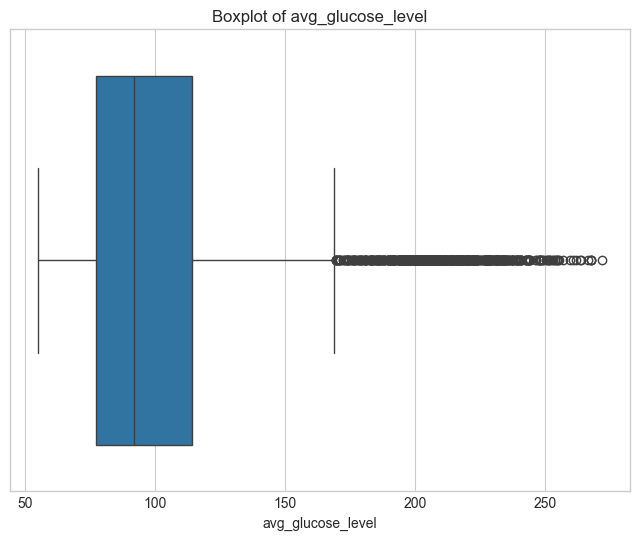

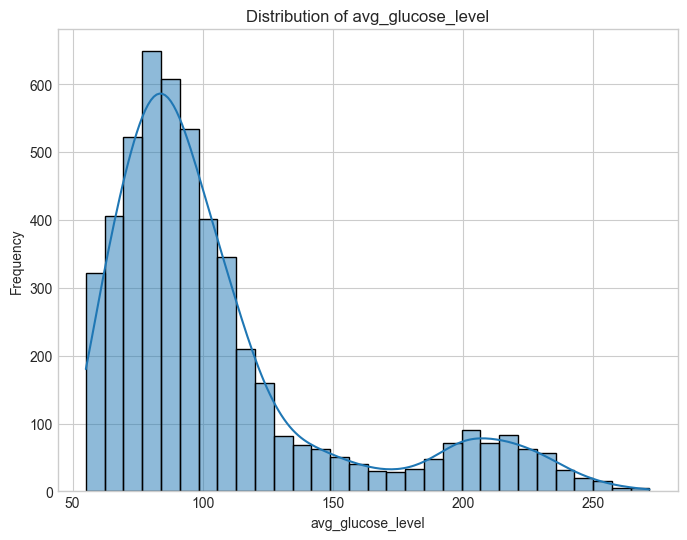

(count    5110.000000
 mean      106.147677
 std        45.283560
 min        55.120000
 25%        77.245000
 50%        91.885000
 75%       114.090000
 max       271.740000
 Name: avg_glucose_level, dtype: float64,
 0)

In [343]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for BMI
bmi_stats = df['avg_glucose_level'].describe()

# Check for missing values in BMI
missing_bmi = df['avg_glucose_level'].isnull().sum()

# Boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df['avg_glucose_level'], orient='h')
plt.title('Boxplot of avg_glucose_level')
plt.xlabel('avg_glucose_level')
plt.show()

# Histogram to visualize BMI distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['avg_glucose_level'], kde=True, bins=30)
plt.title('Distribution of avg_glucose_level')
plt.xlabel('avg_glucose_level')
plt.ylabel('Frequency')
plt.show()

bmi_stats, missing_bmi


In [344]:
# Calculate IQR and determine outliers
Q1 = df['avg_glucose_level'].quantile(0.25)
print(Q1)
Q3 = df['avg_glucose_level'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)

lower_bound = Q1 - 1.5 * IQR
print(lower_bound)
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

# Identify outliers
bmi_outliers = df[(df['avg_glucose_level'] < lower_bound) | (df['avg_glucose_level'] > upper_bound)]

# Count the number of outliers
num_bmi_outliers = len(bmi_outliers)
num_bmi_outliers

77.245
114.09
36.845
21.977500000000006
169.35750000000002


627

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [346]:
df.duplicated().sum()

0

In [347]:
df.select_dtypes(include=('float64', 'int64')).columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [348]:
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke']

In [349]:
categorical_cols = [col for col in df.columns if col not in numeric_cols]
categorical_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [350]:
import matplotlib.pyplot as plt
import seaborn as sns
lst = []
for col in df.columns:
    a = df.groupby('stroke')[col].value_counts()
    a = pd.DataFrame(a).reset_index()
    lst.append(a)
lst

[   stroke  gender  count
 0       0  Female   2853
 1       0    Male   2007
 2       0   Other      1
 3       1  Female    141
 4       1    Male    108,
      stroke   age  count
 0         0  52.0     88
 1         0  57.0     84
 2         0  53.0     83
 3         0  45.0     82
 4         0  51.0     82
 ..      ...   ...    ...
 143       1  32.0      1
 144       1  42.0      1
 145       1  43.0      1
 146       1  46.0      1
 147       1  47.0      1
 
 [148 rows x 3 columns],
    stroke  hypertension  count
 0       0             0   4429
 1       0             1    432
 2       1             0    183
 3       1             1     66,
    stroke  heart_disease  count
 0       0              0   4632
 1       0              1    229
 2       1              0    202
 3       1              1     47,
    stroke ever_married  count
 0       0          Yes   3133
 1       0           No   1728
 2       1          Yes    220
 3       1           No     29,
    stroke      work_

In [351]:
a

,stroke,count
0,0,4861
1,1,249


<Axes: xlabel='gender', ylabel='Count'>

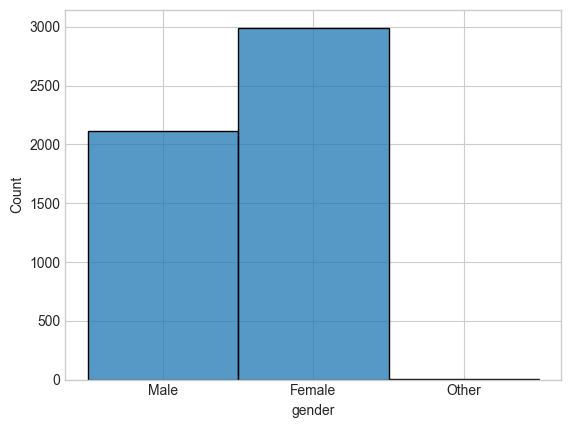

In [352]:
sns.histplot(data=df['gender'])

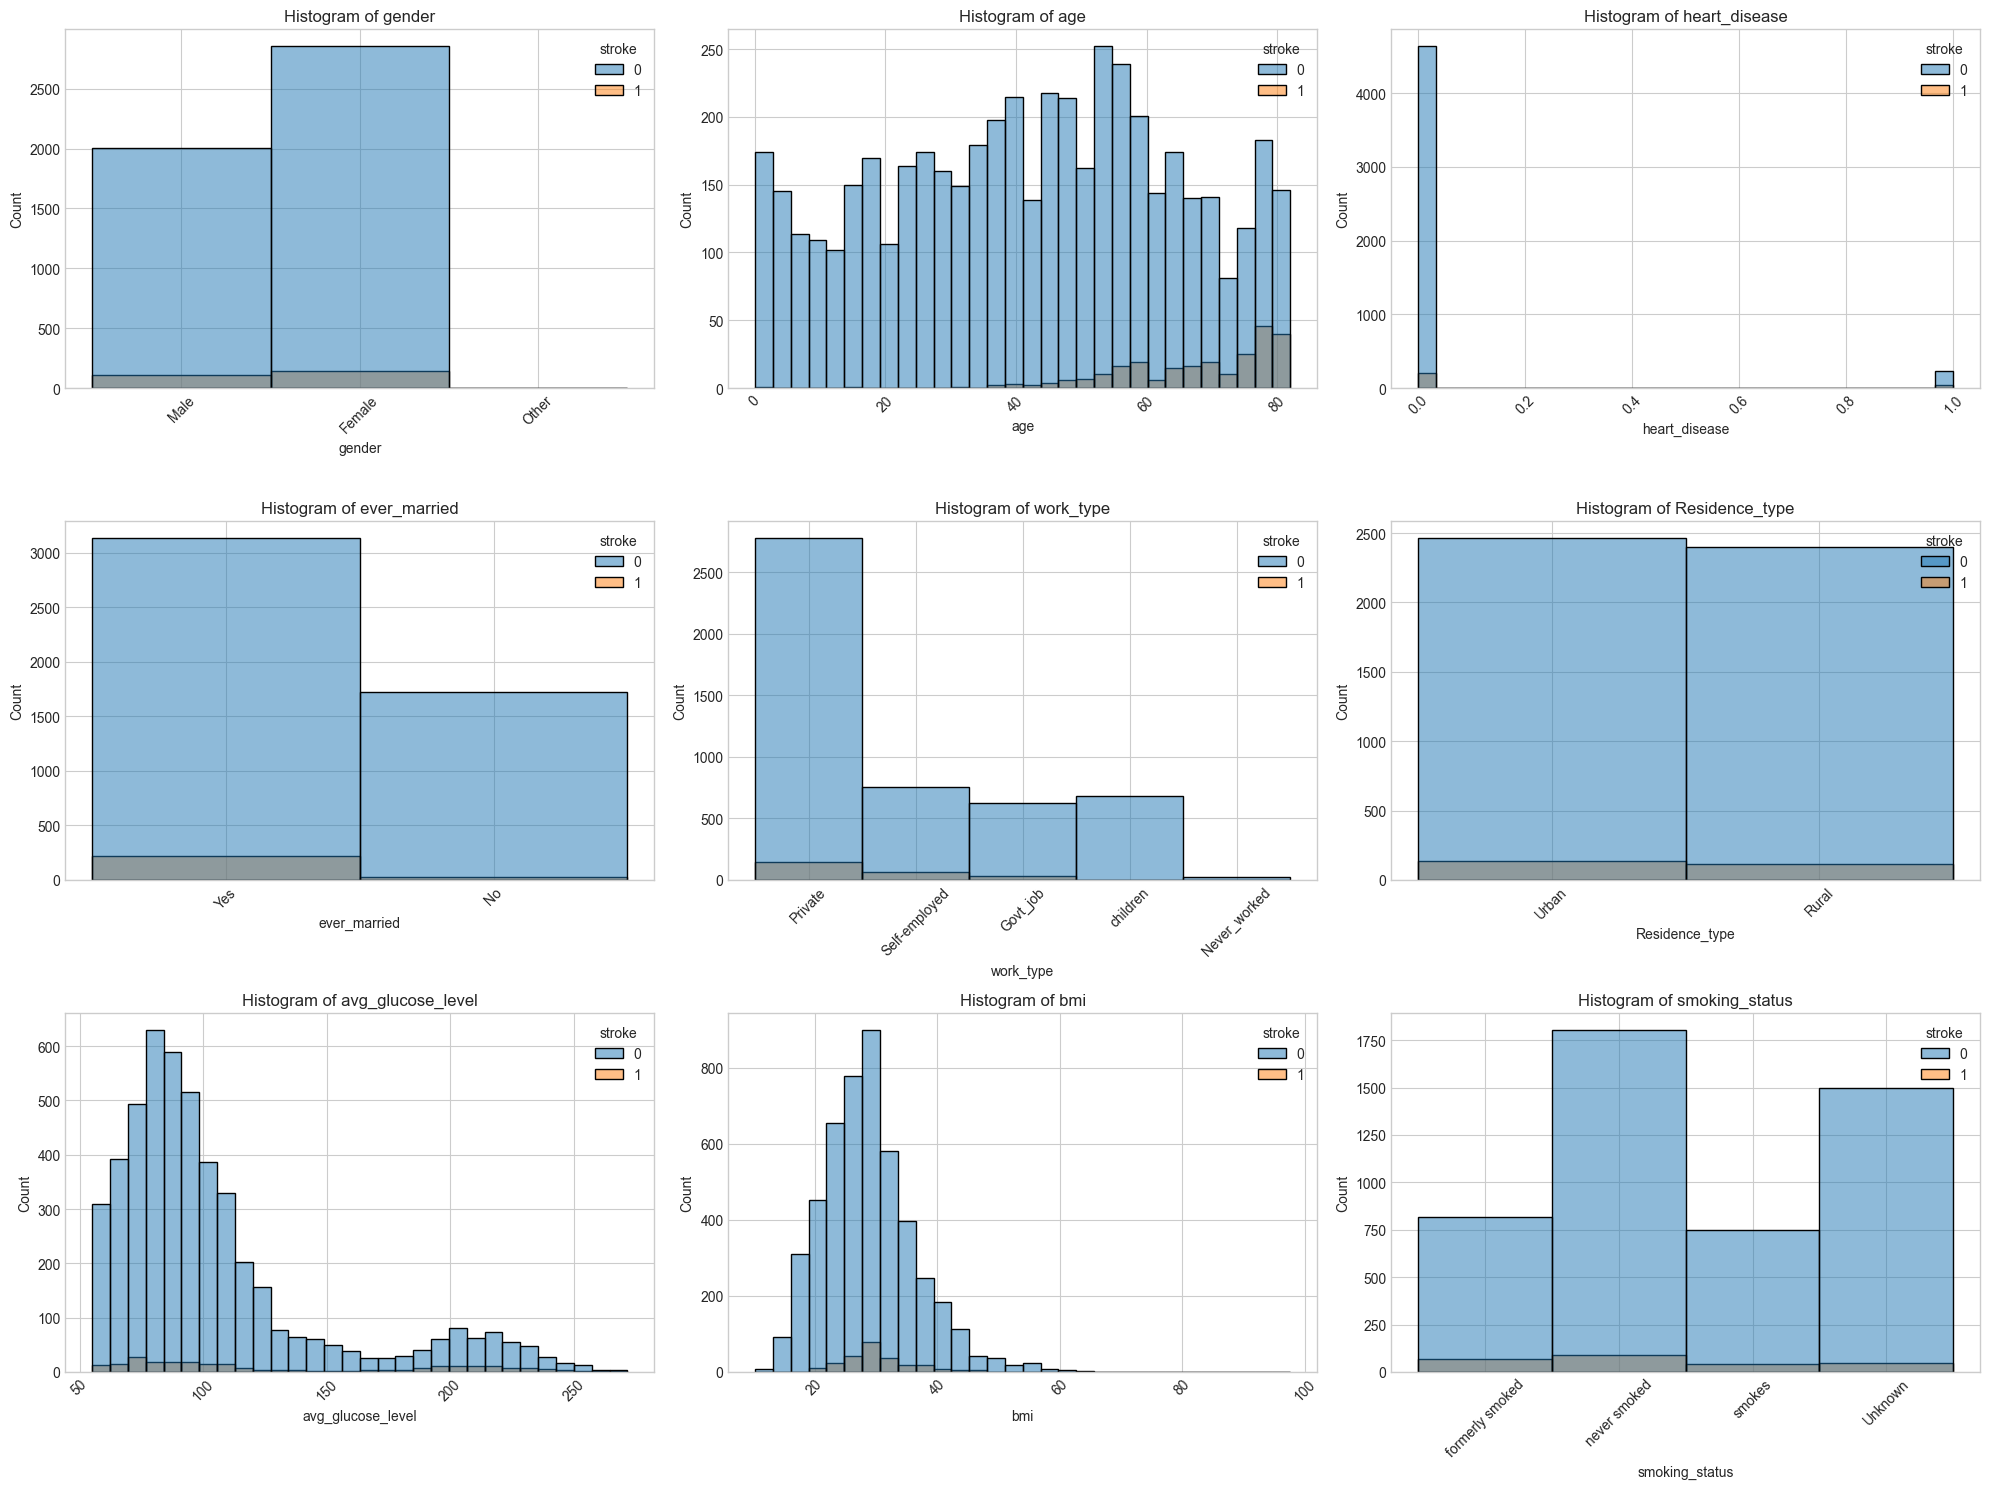

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Danh sách các cột để vẽ (loại bỏ 'id' vì không có ý nghĩa phân tích)
columns = ['gender', 'age', 'heart_disease', 'ever_married', 
           'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
class_column = 'stroke'  # Cột phân loại

# Số cột trong grid layout
ncols = 3  # Số cột cho các subplot
nrows = math.ceil(len(columns) / ncols)  # Tính số hàng cần thiết

# Tạo grid các subplot
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 5))
axes = axes.flatten()  # Làm phẳng mảng các trục con

# Vẽ histogram cho từng cột
for i, col in enumerate(columns):
    sns.histplot(data=df, x=col, hue=class_column, ax=axes[i], bins=30, kde=False)
    axes[i].set_title(f"Histogram of {col}")
    axes[i].tick_params(axis='x', rotation=45)  # Xoay nhãn trục x cho dễ đọc

# Ẩn các subplot không sử dụng
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Căn chỉnh layout
plt.tight_layout()
plt.show()


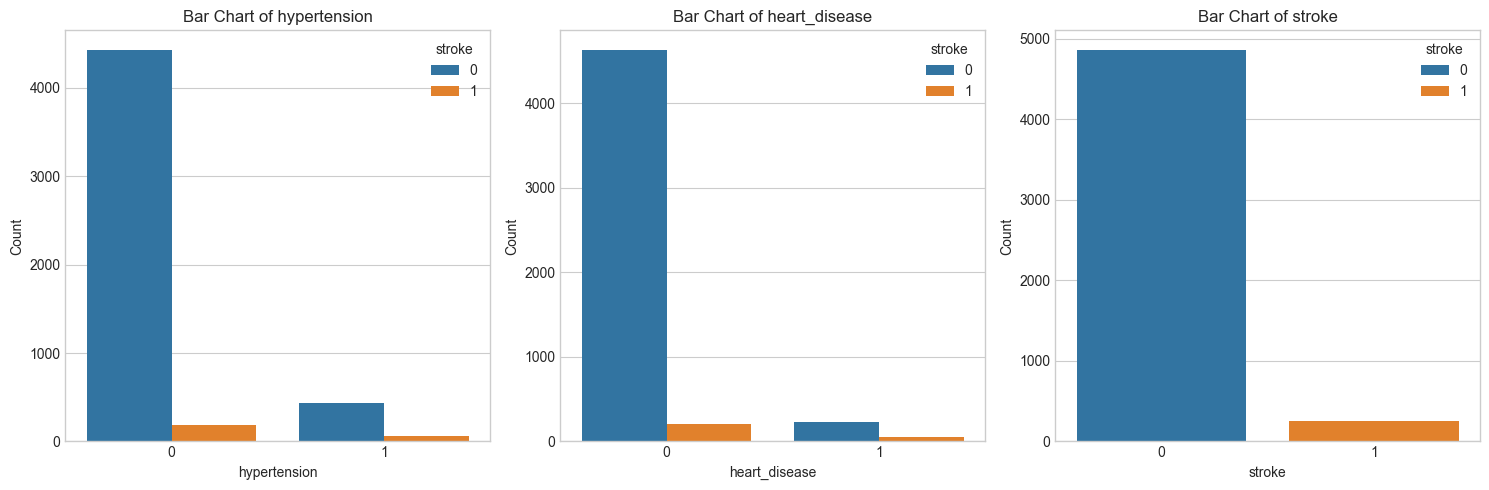

In [354]:
import matplotlib.pyplot as plt
import seaborn as sns

# Các cột nhị phân
class_column = ['hypertension', 'heart_disease', 'stroke']

# Tạo subplots
fig, axes = plt.subplots(1, len(class_column), figsize=(15, 5))

for i, col in enumerate(class_column):
    sns.countplot(data=df, x=col, hue='stroke', ax=axes[i])
    axes[i].set_title(f"Bar Chart of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()


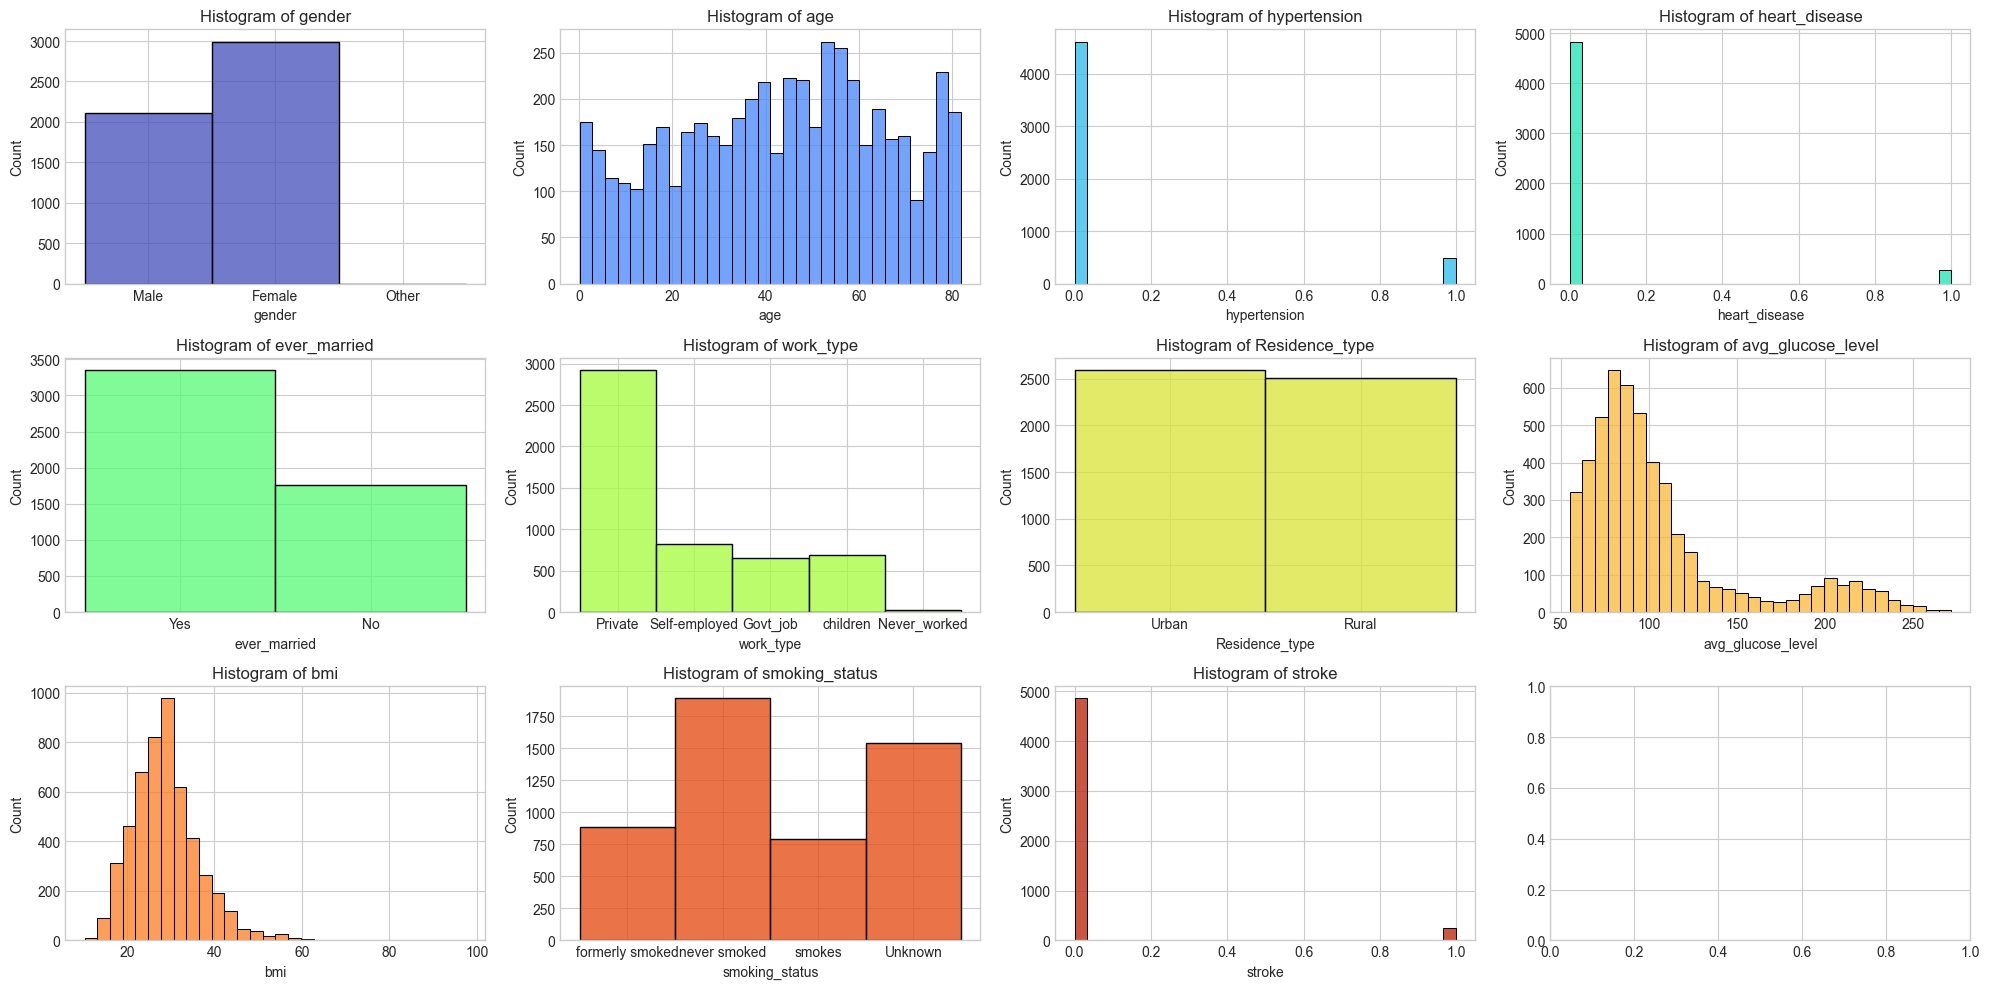

In [355]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
vibrant_palette = sns.color_palette("turbo", len(df.columns))

fig, axes = plt.subplots(3, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(data=df[col], ax=axes[i], bins=30,  color=vibrant_palette[i % len(vibrant_palette)])
    axes[i].set_title(f"Histogram of {col}")

# Adjust layout and display
plt.tight_layout()
plt.show()


<Axes: >

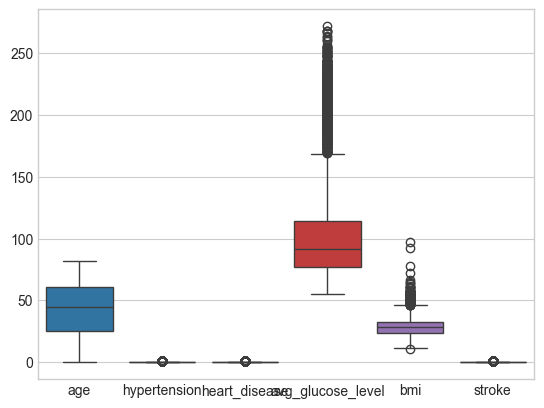

In [356]:
sns.boxplot(df[numeric_cols])

In [357]:
# Calculate IQR and detect outliers for each numeric column
outliers = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

# Display the number of outliers in each column
outlier_summary = {col: len(outliers[col]) for col in numeric_cols}
outlier_summary

{'age': 0,
 'hypertension': 498,
 'heart_disease': 276,
 'avg_glucose_level': 627,
 'bmi': 126,
 'stroke': 249}

In [358]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_no_outliers = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]
rows_before = len(df)
rows_after = len(data_no_outliers)

rows_before, rows_after


(5110, 4984)

<Axes: >

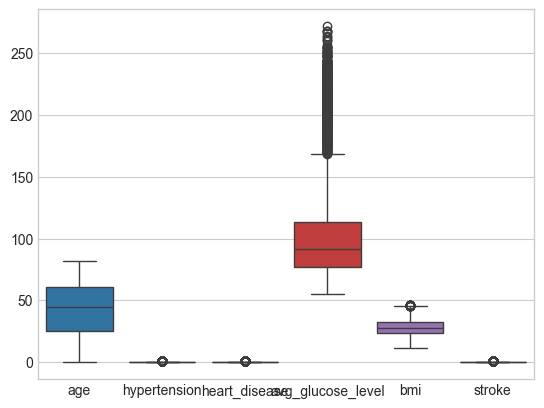

In [359]:
sns.boxplot(data_no_outliers)

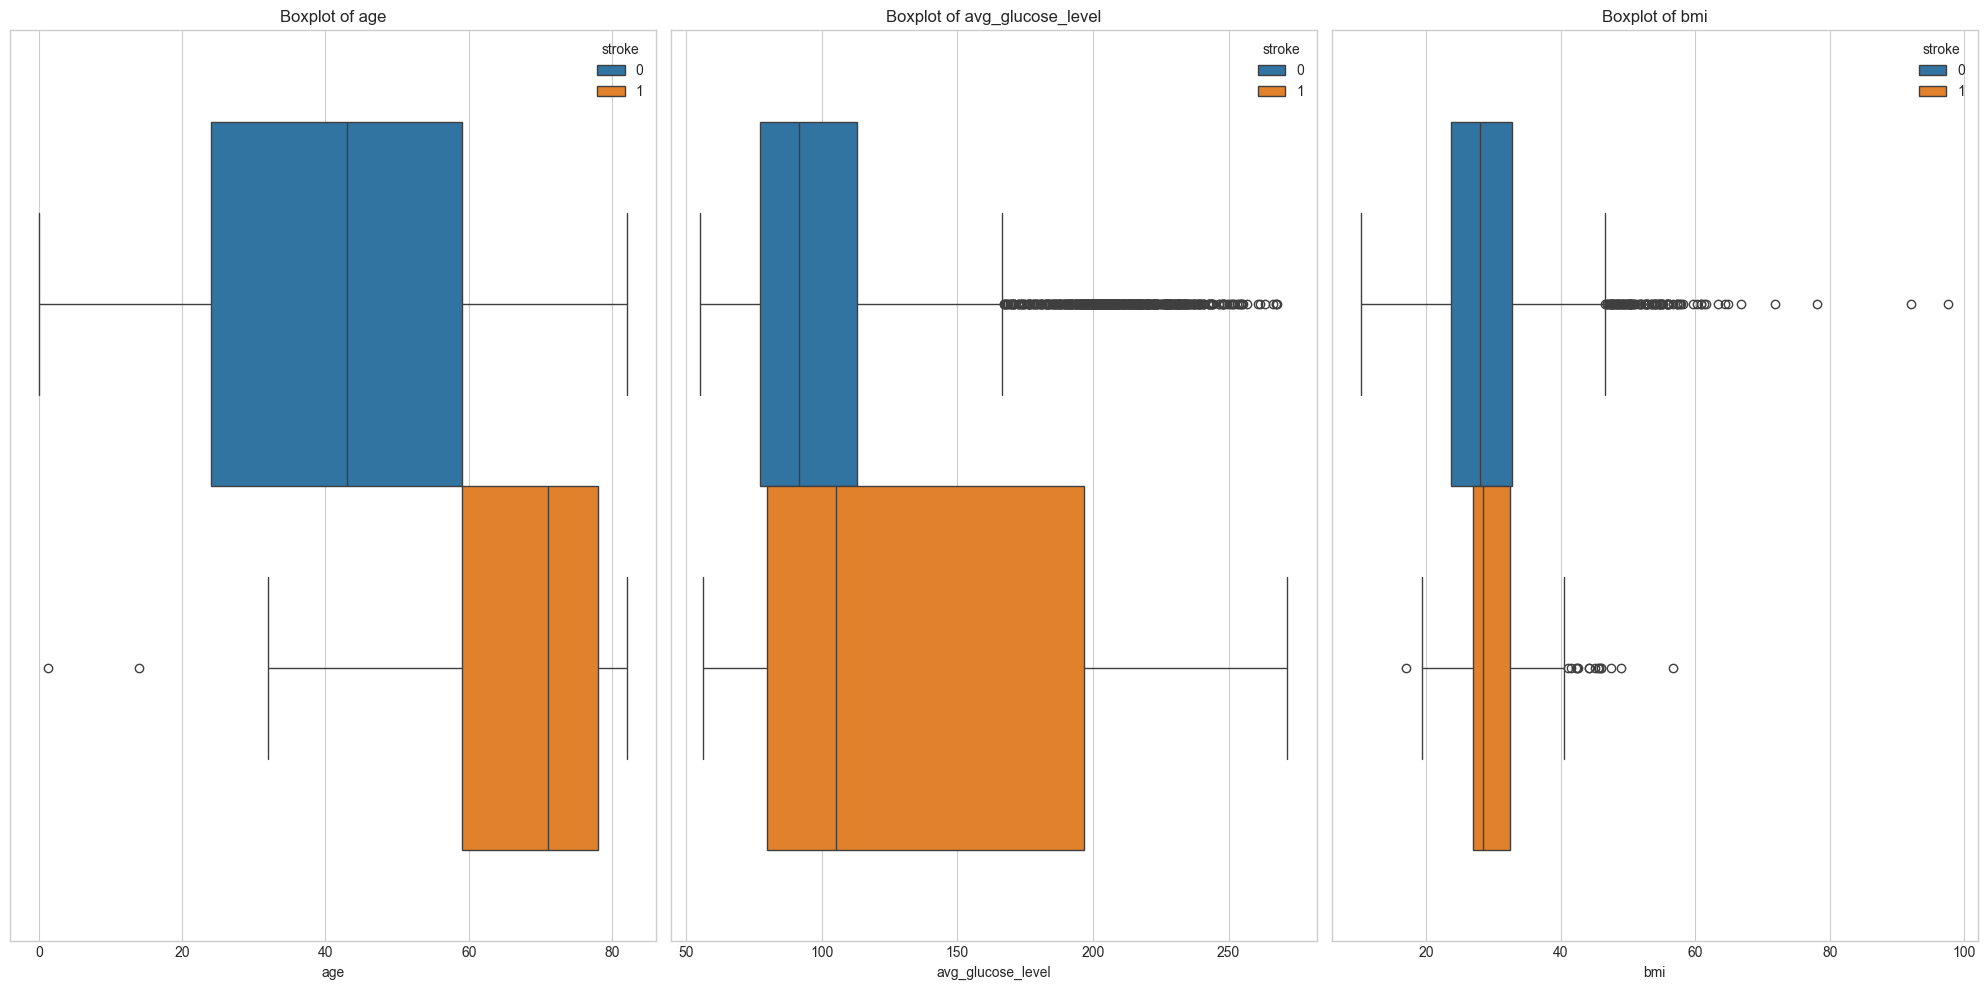

In [360]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['age', 'avg_glucose_level', 'bmi']
class_column = 'stroke' 


# Create subplots for 10 histograms
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes = axes.flatten()

# Plot each feature's histogram
for i, col in enumerate(columns):
    sns.boxplot(data=df, x=col, hue=class_column, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Adjust layout and display
plt.tight_layout()
plt.show()


In [361]:
from scipy.stats import shapiro, bartlett
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.formula.api import ols
from sklearn.feature_selection import f_regression
from statsmodels.api import Logit
import statsmodels.api as sm

In [362]:
from sklearn.preprocessing import RobustScaler, LabelEncoder

# Mã hóa các cột phân loại
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df_original = df.copy()


# Áp dụng RobustScaler cho toàn bộ dataset
scaler = RobustScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])  # Không áp dụng cho cột mục tiêu 'stroke'

df.head()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6384\340370393.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.5  0.   0.  ...  0.  -0.5 -1. ]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])  # Không áp dụng cho cột mục tiêu 'stroke'


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.611111,0,1,0,0,0,3.712987,0.944444,-0.5,1
1,0,0.444444,0,0,0,1,-1,2.994300,-0.033333,0.0,1
2,1,0.972222,0,1,0,0,-1,0.380920,0.488889,0.0,1
3,0,0.111111,0,0,0,0,0,2.153481,0.700000,0.5,1
4,0,0.944444,1,0,0,1,-1,2.231917,-0.455556,0.0,1


In [363]:
# chuẩn hoá bằng robust scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.611111,0,1,0,0,0,3.712987,0.944444,-0.5,1
1,0,0.444444,0,0,0,1,-1,2.994300,-0.033333,0.0,1
2,1,0.972222,0,1,0,0,-1,0.380920,0.488889,0.0,1
3,0,0.111111,0,0,0,0,0,2.153481,0.700000,0.5,1
4,0,0.944444,1,0,0,1,-1,2.231917,-0.455556,0.0,1


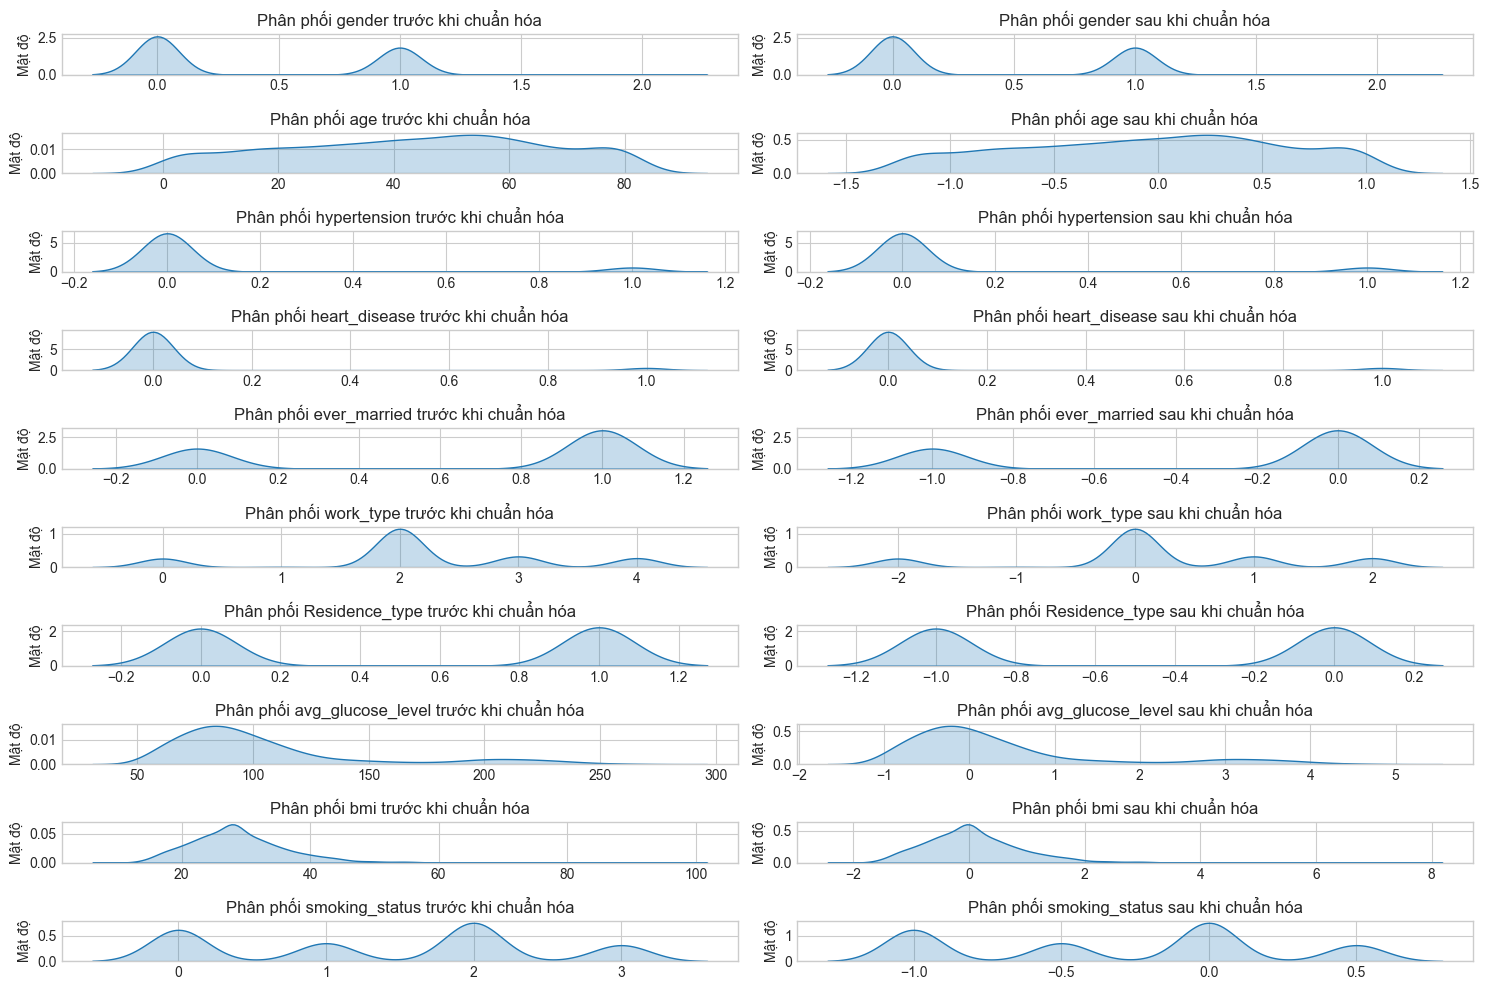

In [364]:

# Danh sách các cột cần vẽ
columns = df.columns[:-1]

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(15, 10))

# Vẽ biểu đồ KDE cho từng cột trước và sau khi chuẩn hóa
for i, col in enumerate(columns):
    plt.subplot(len(columns), 2, 2*i + 1)
    sns.kdeplot(df_original[col], fill=True)
    plt.title(f'Phân phối {col} trước khi chuẩn hóa')
    plt.xlabel('')
    plt.ylabel('Mật độ')

    plt.subplot(len(columns), 2, 2*i + 2)
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Phân phối {col} sau khi chuẩn hóa')
    plt.xlabel('')
    plt.ylabel('Mật độ')

plt.tight_layout()
plt.show()

In [365]:
x1 = df['gender']
x2 = df['age']
x3 = df['hypertension']
x4 = df['heart_disease']
x5 = df['ever_married']
x6 = df['work_type']
x7 = df['Residence_type']
x8 = df['avg_glucose_level']
x9 = df['bmi']
x10 = df['smoking_status']
y = df['stroke']

In [366]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [367]:
def calculate_vif(df):
    # trích xuất các giá trị của dataframe
    X = df.values
    # tạo một dataframe rỗng để lưu kq vif
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return vif_data

In [368]:
X_0 = pd.DataFrame({'x1': x1,'x2': x2, 'x3':x3, 'x4':x4, 'x5':x5, 'x6':x6, 'x7':x7, 'x8':x8, 'x9':x9, 'x10':x10})
print(calculate_vif(X_0))

  feature       VIF
0      x1  1.480447
1      x2  2.135948
2      x3  1.209098
3      x4  1.171113
4      x5  2.412230
5      x6  1.311718
6      x7  1.497101
7      x8  1.197649
8      x9  1.210303
9     x10  1.455448


In [369]:
X = X_0  # Lựa chọn các biến phù hợp từ kết quả VIF
X = sm.add_constant(X)
model = Logit(y,X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.155535
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5099
Method:                           MLE   Df Model:                           10
Date:                Tue, 07 Jan 2025   Pseudo R-squ.:                  0.2014
Time:                        18:29:49   Log-Likelihood:                -794.79
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 6.358e-80
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0279      0.172    -23.371      0.000      -4.366      -3.690
x1             0.0510      0.

In [370]:
X_1 = pd.DataFrame({'x1': x1,'x2': x2, 'x3':x3, 'x4': x4, 'x5':x5, 'x6':x6, 'x7':x7, 'x8':x8, 'x9':x9})
print(calculate_vif(X_1))

  feature       VIF
0      x1  1.442230
1      x2  2.135789
2      x3  1.208774
3      x4  1.171075
4      x5  2.311428
5      x6  1.263237
6      x7  1.462696
7      x8  1.196549
8      x9  1.206793


In [371]:
X = X_1  # Lựa chọn các biến phù hợp từ kết quả VIF
X = sm.add_constant(X)
model = Logit(y,X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.155535
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5100
Method:                           MLE   Df Model:                            9
Date:                Tue, 07 Jan 2025   Pseudo R-squ.:                  0.2014
Time:                        18:29:49   Log-Likelihood:                -794.79
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 9.243e-81
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0281      0.170    -23.730      0.000      -4.361      -3.695
x1             0.0510      0.

In [372]:
X_2 = pd.DataFrame({'x1': x1,'x2': x2, 'x3':x3, 'x4': x4, 'x5':x5, 'x6': x6, 'x7':x7, 'x8':x8})
print(calculate_vif(X_2))

  feature       VIF
0      x1  1.439328
1      x2  2.113300
2      x3  1.196582
3      x4  1.169662
4      x5  2.293010
5      x6  1.215423
6      x7  1.453580
7      x8  1.179442


In [373]:
X = X_2  # Lựa chọn các biến phù hợp từ kết quả VIF
X = sm.add_constant(X)
model = Logit(y,X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.155536
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5101
Method:                           MLE   Df Model:                            8
Date:                Tue, 07 Jan 2025   Pseudo R-squ.:                  0.2014
Time:                        18:29:49   Log-Likelihood:                -794.79
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 1.265e-81
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0299      0.167    -24.130      0.000      -4.357      -3.703
x1             0.0511      0.

In [374]:
X_3 = pd.DataFrame({'x2': x2, 'x3':x3, 'x4': x4, 'x5':x5, 'x6': x6, 'x7':x7, 'x8':x8})
print(calculate_vif(X_3))

  feature       VIF
0      x2  2.106400
1      x3  1.187969
2      x4  1.154536
3      x5  2.164189
4      x6  1.214643
5      x7  1.343021
6      x8  1.164661


In [375]:
X = X_3  # Lựa chọn các biến phù hợp từ kết quả VIF
X = sm.add_constant(X)
model = Logit(y,X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.155549
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5102
Method:                           MLE   Df Model:                            7
Date:                Tue, 07 Jan 2025   Pseudo R-squ.:                  0.2013
Time:                        18:29:49   Log-Likelihood:                -794.85
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 1.718e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0081      0.156    -25.764      0.000      -4.313      -3.703
x2             2.5207      0.

In [376]:
X_4 = pd.DataFrame({'x2': x2, 'x3':x3, 'x4': x4, 'x5':x5, 'x6': x6, 'x8':x8})
print(calculate_vif(X_4))

  feature       VIF
0      x2  2.069775
1      x3  1.168770
2      x4  1.150656
3      x5  1.824505
4      x6  1.214366
5      x8  1.148333


In [377]:
X = X_4  # Lựa chọn các biến phù hợp từ kết quả VIF
X = sm.add_constant(X)
model = Logit(y,X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.155599
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5103
Method:                           MLE   Df Model:                            6
Date:                Tue, 07 Jan 2025   Pseudo R-squ.:                  0.2010
Time:                        18:29:49   Log-Likelihood:                -795.11
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 2.591e-83
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0577      0.140    -28.939      0.000      -4.333      -3.783
x2             2.5265      0.

In [378]:
X_5 = pd.DataFrame({'x2': x2, 'x3':x3, 'x4': x4, 'x5':x5, 'x8':x8})
print(calculate_vif(X_5))

  feature       VIF
0      x2  1.979271
1      x3  1.167039
2      x4  1.147271
3      x5  1.774179
4      x8  1.147803


In [379]:
X = X_5  # Lựa chọn các biến phù hợp từ kết quả VIF
X = sm.add_constant(X)
model = Logit(y,X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.155653
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5104
Method:                           MLE   Df Model:                            5
Date:                Tue, 07 Jan 2025   Pseudo R-squ.:                  0.2008
Time:                        18:29:49   Log-Likelihood:                -795.39
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 3.617e-84
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0461      0.139    -29.159      0.000      -4.318      -3.774
x2             2.5084      0.

In [391]:
X_6 = pd.DataFrame({'x2': x2, 'x3':x3, 'x4': x4, 'x8':x8})
print(calculate_vif(X_6))

  feature       VIF
0      x2  1.122280
1      x3  1.119306
2      x4  1.104102
3      x8  1.121480


In [392]:
X = X_6  # Lựa chọn các biến phù hợp từ kết quả VIF
X = sm.add_constant(X)
model = Logit(y,X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.155720
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5105
Method:                           MLE   Df Model:                            4
Date:                Tue, 07 Jan 2025   Pseudo R-squ.:                  0.2004
Time:                        18:43:47   Log-Likelihood:                -795.73
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 4.774e-85
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0091      0.132    -30.454      0.000      -4.267      -3.751
x2             2.4813      0.

In [393]:
X_7 = pd.DataFrame({'x2': x2, 'x3':x3, 'x8':x8})
print(calculate_vif(X_7))

  feature       VIF
0      x2  1.084877
1      x3  1.110647
2      x8  1.093105


In [394]:
X = X_7  # Lựa chọn các biến phù hợp từ kết quả VIF
X = sm.add_constant(X)
model = Logit(y,X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.156010
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5106
Method:                           MLE   Df Model:                            3
Date:                Tue, 07 Jan 2025   Pseudo R-squ.:                  0.1989
Time:                        18:44:08   Log-Likelihood:                -797.21
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 1.672e-85
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0025      0.132    -30.319      0.000      -4.261      -3.744
x2             2.5411      0.

In [395]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X_7, y, test_size=0.2, random_state=42)

# Huan luyen mo hinh
model = LogisticRegression()
model.fit(X_train, y_train)

# Intercept va Cofficient
intercept = model.intercept_
cofficient = model.coef_
print(f' He so chan Intercept: {intercept}')
print(f' He so hoi quy ung voi tung dac trung Cofficients: {cofficient}')

# Du doan tren tap Test
y_pred = model.predict(X_test)


# Danh gia mo hinh
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

 He so chan Intercept: [-3.99222363]
 He so hoi quy ung voi tung dac trung Cofficients: [[2.42542491 0.35243037 0.15033073]]
Accuracy:  0.9393346379647749
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

 He so chan Intercept: [-4.03888309]
 He so hoi quy ung voi tung dac trung Cofficients: [[ 2.4159028   0.34041654  0.32394743 -0.26601361 -0.03424843  0.04984522
   0.14672482]]
ROC AUC:  0.8524361559139785
False Positive Rate:  [0.         0.00104167 0.003125   0.003125   0.00416667 0.00416667
 0.00729167 0.00729167 0.00833333 0.00833333 0.01145833 0.01145833
 0.0125     0.0125     0.01354167 0.01354167 0.01875    0.01875
 0.02083333 0.02083333 0.02395833 0.02395833 0.03125    0.03125
 0.03229167 0.03229167 0.03541667 0.03541667 0.03645833 0.03645833
 0.040625   0.040625   0.04375    0.04375    0.046875   0.046875
 0.059375   0.059375   0.06354167 0.06354167 0.06979167 0.06979167
 0.07291667 0.07291667 0.07708333 0.07708333 0.08333333 0.08333333
 0.1        0.1        0.103125   0.103125   0.11458333 0.11458333
 0.11666667 0.11666667 0.125      0.125      0.1375     0.1375
 0.14166667 0.14166667 0.14375    0.14375    0.15208333 0.15208333
 0.19166667 0.19166667 0.19583333 0.19583333 0

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

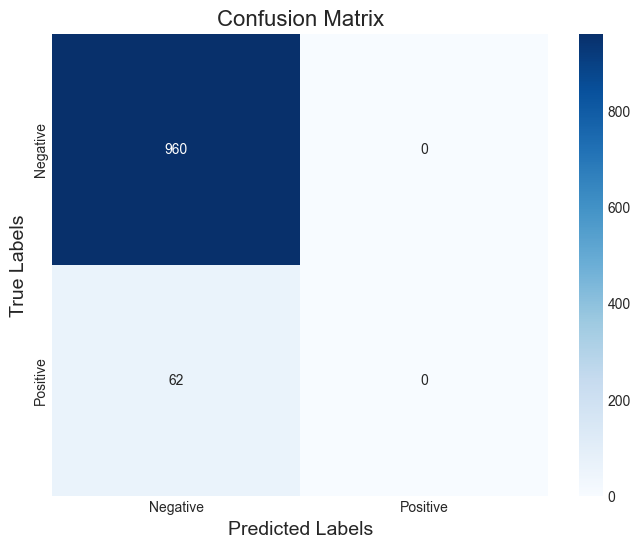

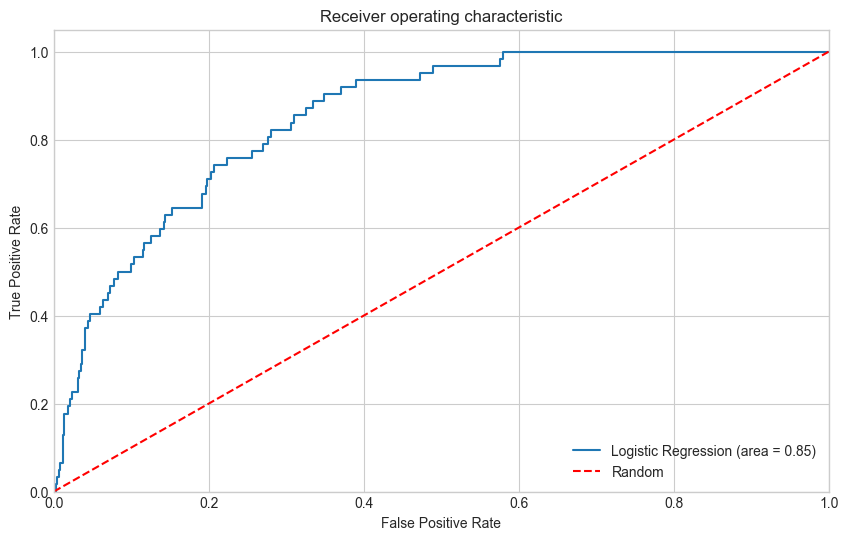

In [396]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X_3, y, test_size=0.2, random_state=42)

# Huan luyen mo hinh
model = LogisticRegression()
model.fit(X_train, y_train)

# Intercept va Cofficient
intercept = model.intercept_
cofficient = model.coef_
print(f' He so chan Intercept: {intercept}')
print(f' He so hoi quy ung voi tung dac trung Cofficients: {cofficient}')

# Du doan tren tap Test
y_pred = model.predict(X_test)

# ROC AUC
from sklearn.metrics import roc_auc_score
y_pred_prob = model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print('ROC AUC: ', roc_auc)


# Đường cong ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print('False Positive Rate: ', fpr)
print('True Positive Rate: ', tpr)
print('Thresholds: ', thresholds)

# Danh gia mo hinh
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Tạo biểu đồ
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# Cấu hình biểu đồ
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()
# Vẽ đường cong ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


### Random Forest


<Axes: >

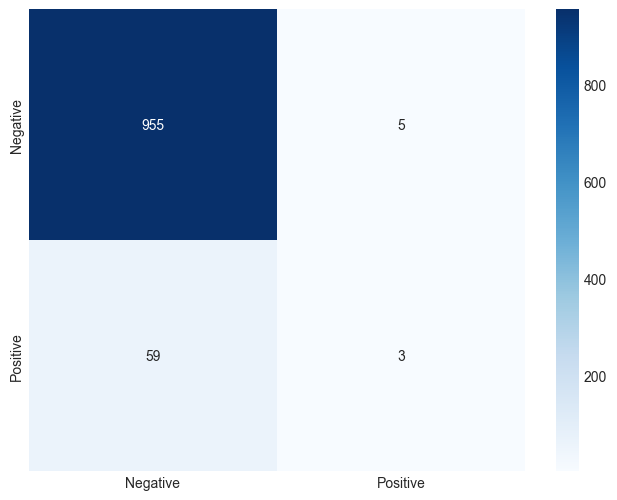

In [406]:

from sklearn.ensemble import RandomForestClassifier
# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Dự đoán và đánh giá Random Forest
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
rf_classification_report = classification_report(y_test, y_pred_rf)
rf_auc_roc = roc_auc_score(y_test, y_prob_rf)

# Hiển thị kết quả
results = {
    "Random Forest": {
        "Classification Report": rf_classification_report,
        "AUC-ROC": rf_auc_roc
    }
}


# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_rf)

# Tạo biểu đồ
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])



In [398]:
significant_features = ['x2', 'x3', 'x8']
X_significant = X_7[significant_features]

# Chạy hồi quy logistic với các biến có ý nghĩa
import statsmodels.api as sm
logit_model = sm.Logit(y, X_significant)
result = logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.610040
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5107
Method:                           MLE   Df Model:                            2
Date:                Tue, 07 Jan 2025   Pseudo R-squ.:                  -2.132
Time:                        18:45:10   Log-Likelihood:                -3117.3
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x2             0.9833      0.052     18.815      0.000       0.881       1.086
x3            -2.1011      0.

In [389]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_prob = result.predict(X_significant)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y, y_pred))


Confusion Matrix:
[[3248 1613]
 [ 135  114]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.67      0.79      4861
           1       0.07      0.46      0.12       249

    accuracy                           0.66      5110
   macro avg       0.51      0.56      0.45      5110
weighted avg       0.92      0.66      0.76      5110



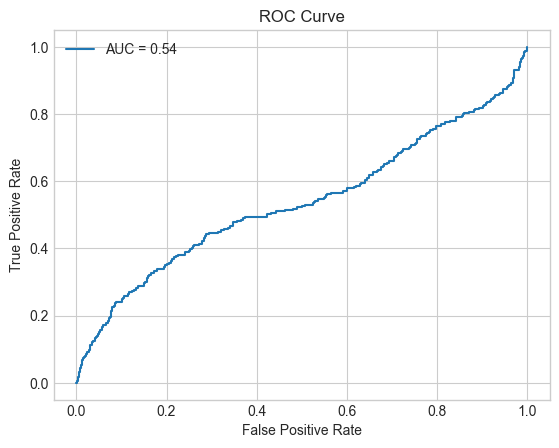

In [390]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
auc = roc_auc_score(y, y_pred_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
